<div style="text-align: center; font-size: 36px; font-weight: bold; color: #3498db; transition: color 0.5s;">
    <span onmouseover="this.style.color='#2ecc71'" onmouseout="this.style.color='#3498db'">
        J. G. Jerlshin
    </span>
</div>


### Decision Tree

## Task 1


ID3 for Classification

* Import the necessary libraries (e.g., pandas, scikit-learn).
* Load a classification dataset  attached.
* Preprocess the data (handle missing values, encode categorical variables if necessary).
* Implement ID3 algorithm for classification using a recursive approach.
* Train the decision tree on the dataset.
* Evaluate the performance of the decision tree using metrics like accuracy, precision, recall, and F1-score.
* Visualize the decision tree.


In [18]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree

file_path = "../Categorical 1.csv"
df = pd.read_csv(file_path)

df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,Normal


In [5]:
# Preprocessing
# Convert categorical columns to numerical values using LabelEncoder
label_encoders = {}
for column in df.columns:
    if df[column].dtype == object:  # Check if the column is categorical
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Separate features and target variable
X = df.drop('Expert Diagnose', axis=1)
y = df['Expert Diagnose']


In [6]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement ID3 algorithm using DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.61
Precision: 0.73
Recall: 0.61
F1 Score: 0.58


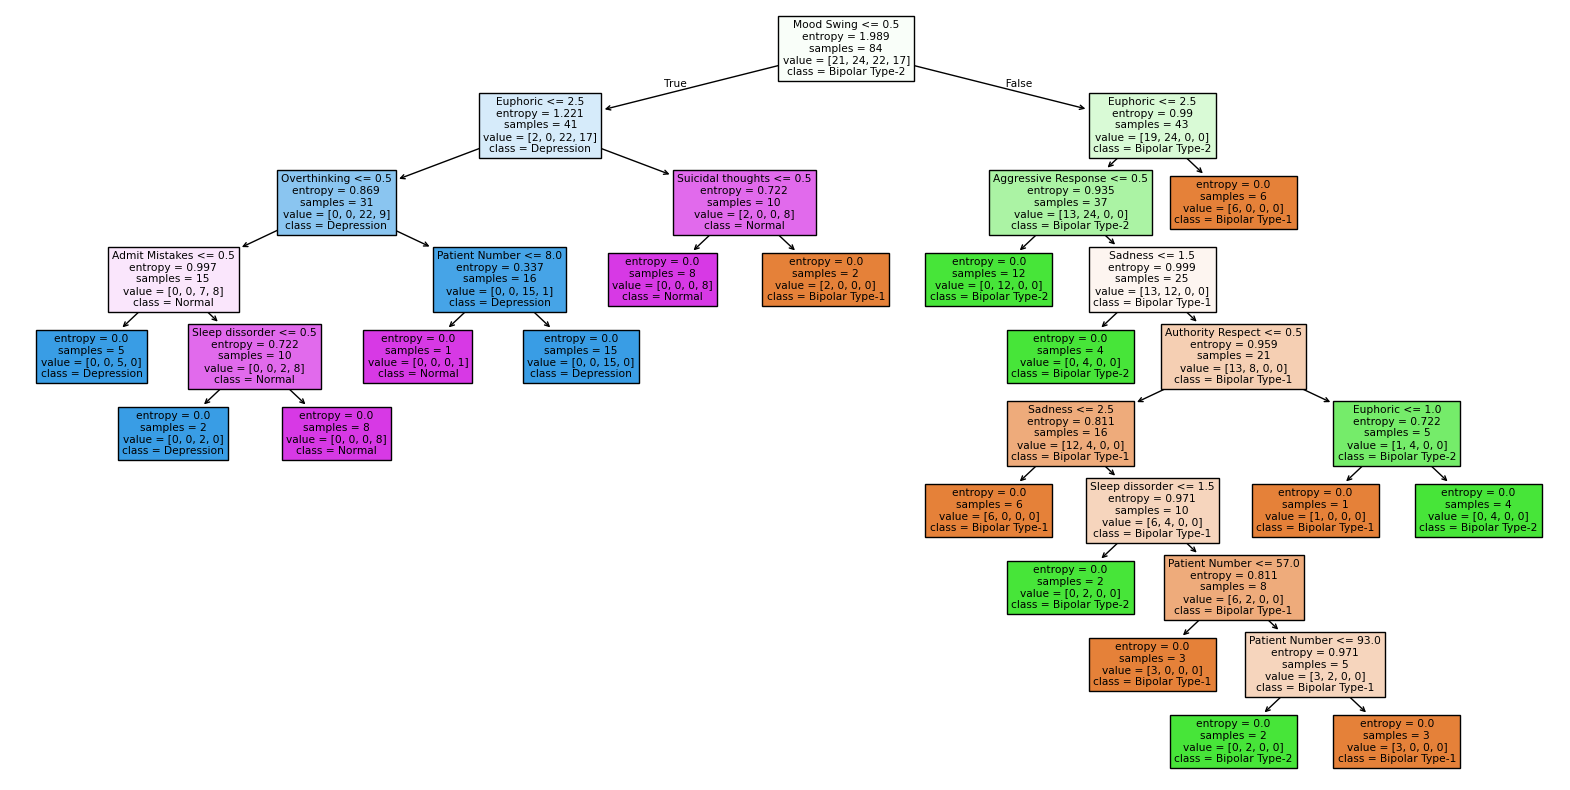

|--- Mood Swing <= 0.50
|   |--- Euphoric <= 2.50
|   |   |--- Overthinking <= 0.50
|   |   |   |--- Admit Mistakes <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- Admit Mistakes >  0.50
|   |   |   |   |--- Sleep dissorder <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- Sleep dissorder >  0.50
|   |   |   |   |   |--- class: 3
|   |   |--- Overthinking >  0.50
|   |   |   |--- Patient Number <= 8.00
|   |   |   |   |--- class: 3
|   |   |   |--- Patient Number >  8.00
|   |   |   |   |--- class: 2
|   |--- Euphoric >  2.50
|   |   |--- Suicidal thoughts <= 0.50
|   |   |   |--- class: 3
|   |   |--- Suicidal thoughts >  0.50
|   |   |   |--- class: 0
|--- Mood Swing >  0.50
|   |--- Euphoric <= 2.50
|   |   |--- Aggressive Response <= 0.50
|   |   |   |--- class: 1
|   |   |--- Aggressive Response >  0.50
|   |   |   |--- Sadness <= 1.50
|   |   |   |   |--- class: 1
|   |   |   |--- Sadness >  1.50
|   |   |   |   |--- Authority Respect <= 0.50
|   |   |   |   |

In [7]:
# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=label_encoders['Expert Diagnose'].classes_)
plt.show()

# Print the tree rules
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


## Task-2

Consider the student data set comprised of feature :

1. Student type ( Hosteller/ DAYscholar)
2. CGPA ( 9,8,7)
3. Attendance(  High, Average, Low)
4. Backlogs( Y/N)
5. Registration slot( S1,S2,S3).- TARGET VARIABLE.

Construct the data set and demonstrate the decision tree process.





In [31]:
# Define the possible values for each feature
student_types = ['Hosteller', 'Day Scholar']
cgpa = [9, 8, 7]
attendance = ['High', 'Average', 'Low']
backlogs = ['Y', 'N']
registration_slots = ['S1', 'S2', 'S3']  # Target variable


# Function to generate the dataset
def generate_student_dataset(num_samples):
    np.random.seed(42)  # For reproducibility
    data = {
        'Student Type': np.random.choice(student_types, num_samples),
        'CGPA': np.random.choice(cgpa, num_samples),
        'Attendance': np.random.choice(attendance, num_samples),
        'Backlogs': np.random.choice(backlogs, num_samples),
        'Registration Slot': np.random.choice(registration_slots, num_samples)  # Target variable
    }
    return pd.DataFrame(data)


num_samples = 100
student_data = generate_student_dataset(num_samples)

# Display the first few rows of the dataset
print(student_data.head())

  Student Type  CGPA Attendance Backlogs Registration Slot
0    Hosteller     7    Average        N                S1
1  Day Scholar     8    Average        N                S1
2    Hosteller     8        Low        Y                S2
3    Hosteller     8    Average        N                S1
4    Hosteller     8        Low        Y                S2


In [16]:
np.random.choice(['a', 'b'], 10, p=[0.7, 0.3])  # radomly generating samples from the list
# p - probabilities of features

array(['a', 'a', 'a', 'a', 'b', 'a', 'a', 'b', 'b', 'a'], dtype='<U1')

In [20]:
student_data.describe()

,CGPA
count,100.000000
mean,7.960000
std,0.863631
min,7.000000
25%,7.000000
50%,8.000000
75%,9.000000
max,9.000000


In [21]:
student_data['Student Type'].value_counts()

Student Type
Day Scholar    56
Hosteller      44
Name: count, dtype: int64

#### Bar Plot for Categorical Variables

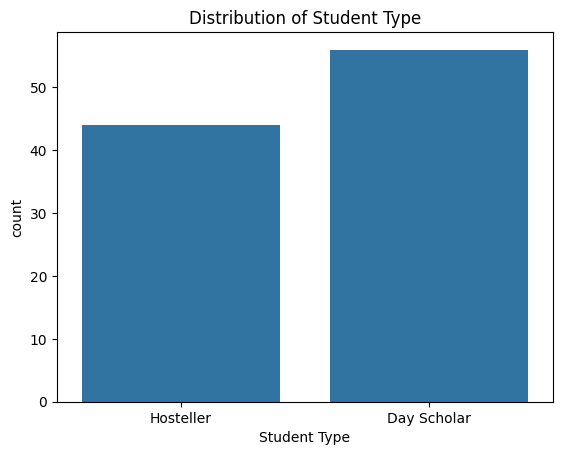

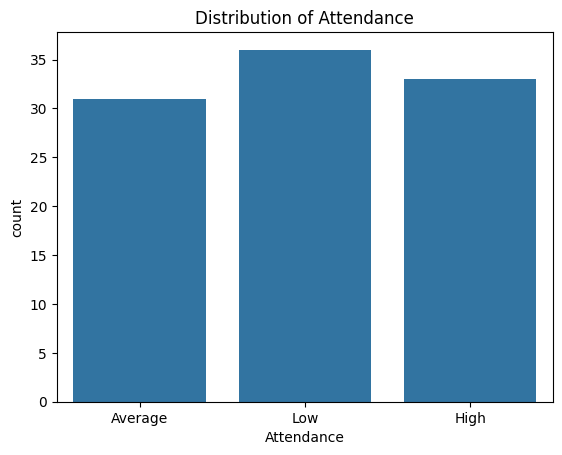

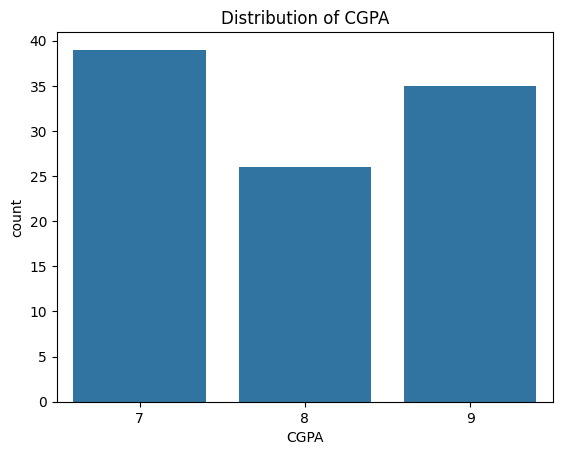

In [19]:
# Bar plot for 'Student Type'
sns.countplot(x='Student Type', data=student_data)
plt.title('Distribution of Student Type')
plt.show()

# Bar plot for 'Attendance'
sns.countplot(x='Attendance', data=student_data)
plt.title('Distribution of Attendance')
plt.show()

# Bar plot for 'CGPA'
sns.countplot(x='CGPA', data=student_data)
plt.title('Distribution of CGPA')
plt.show()


#### Pair plot

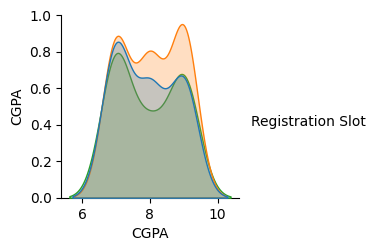

In [23]:
sns.pairplot(student_data, hue='Registration Slot')
plt.show()

#### Heatmap for Correlation

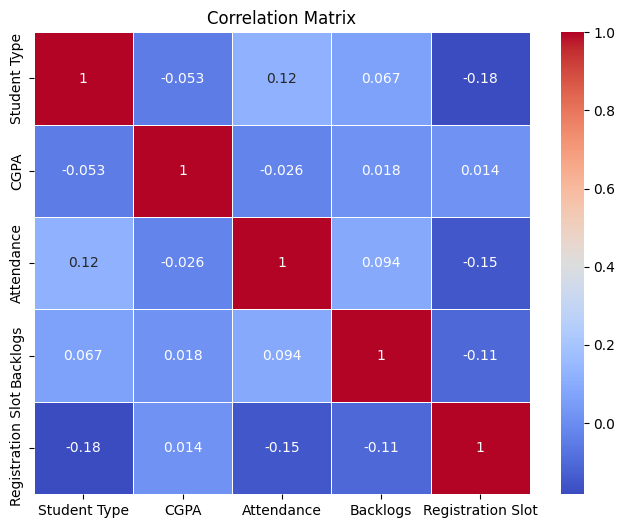

In [24]:
# Encode categorical variables for correlation matrix
encoded_data = student_data.copy()
for column in encoded_data.select_dtypes(include=['object']).columns:
    encoded_data[column] = le.fit_transform(encoded_data[column])

# Plot heatmap of the correlation matrix
plt.figure(figsize=(8,6))
sns.heatmap(encoded_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


#### Facet Grid

/home/jerlshin/ENV/env_torch/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


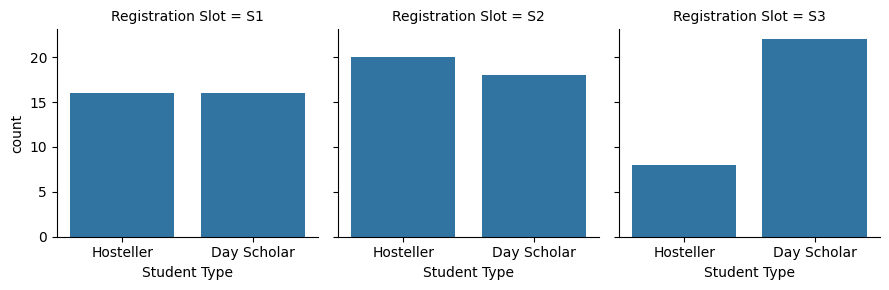

In [25]:
g = sns.FacetGrid(student_data, col="Registration Slot")
g.map(sns.countplot, "Student Type")
plt.show()


#### Pie Chart

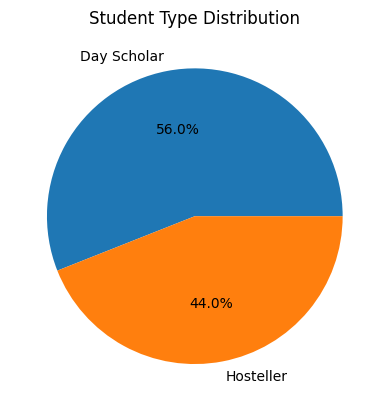

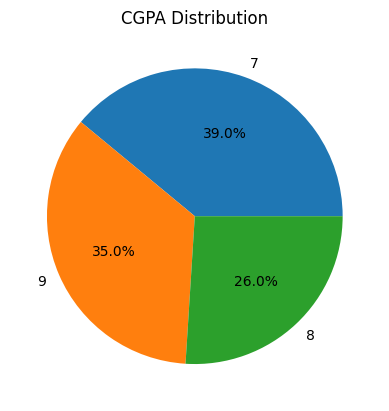

In [26]:
# Pie chart for 'Student Type'
student_type_counts = student_data['Student Type'].value_counts()
plt.pie(student_type_counts, labels=student_type_counts.index, autopct='%1.1f%%')
plt.title('Student Type Distribution')
plt.show()

# Pie chart for 'CGPA'
cgpa_counts = student_data['CGPA'].value_counts()
plt.pie(cgpa_counts, labels=cgpa_counts.index, autopct='%1.1f%%')
plt.title('CGPA Distribution')
plt.show()


#### Box Plot

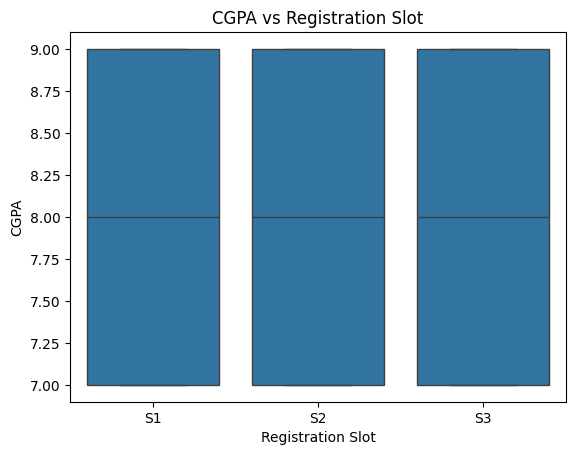

In [27]:
# Box plot for CGPA distribution with respect to Registration Slot
sns.boxplot(x='Registration Slot', y='CGPA', data=student_data)
plt.title('CGPA vs Registration Slot')
plt.show()


#### Stacked Bar Chart

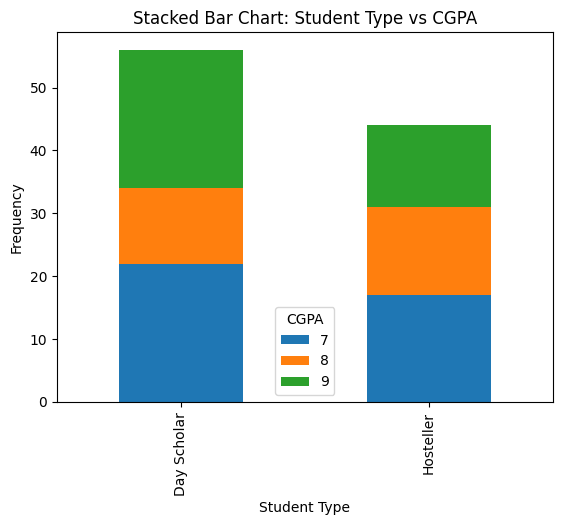

In [28]:
pd.crosstab(student_data['Student Type'], student_data['CGPA']).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart: Student Type vs CGPA')
plt.xlabel('Student Type')
plt.ylabel('Frequency')
plt.show()


#### 3D Scatter Plot

In [29]:
import plotly.express as px

fig = px.scatter_3d(student_data, x='CGPA', y='Attendance', z='Registration Slot', 
                    color='Student Type', symbol='Backlogs')
fig.show()


In [36]:
df = pd.DataFrame(student_data)
df

,Student Type,CGPA,Attendance,Backlogs,Registration Slot
0,Hosteller,7,Average,N,S1
1,Day Scholar,8,Average,N,S1
2,Hosteller,8,Low,Y,S2
3,Hosteller,8,Average,N,S1
4,Hosteller,8,Low,Y,S2
...,...,...,...,...,...
95,Day Scholar,9,Average,Y,S3
96,Day Scholar,8,Low,N,S3
97,Day Scholar,9,Low,Y,S1
98,Day Scholar,9,Average,N,S2


In [40]:
# Preprocessing
# Convert categorical columns to numerical values using LabelEncoder
label_encoders = {}
for column in df.columns:
    if df[column].dtype == object:  # Check if the column is categorical
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Separate features and target variable
X = df.drop('Registration Slot', axis=1)
y = df['Registration Slot']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Implement Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.30
Precision: 0.32
Recall: 0.30
F1 Score: 0.29


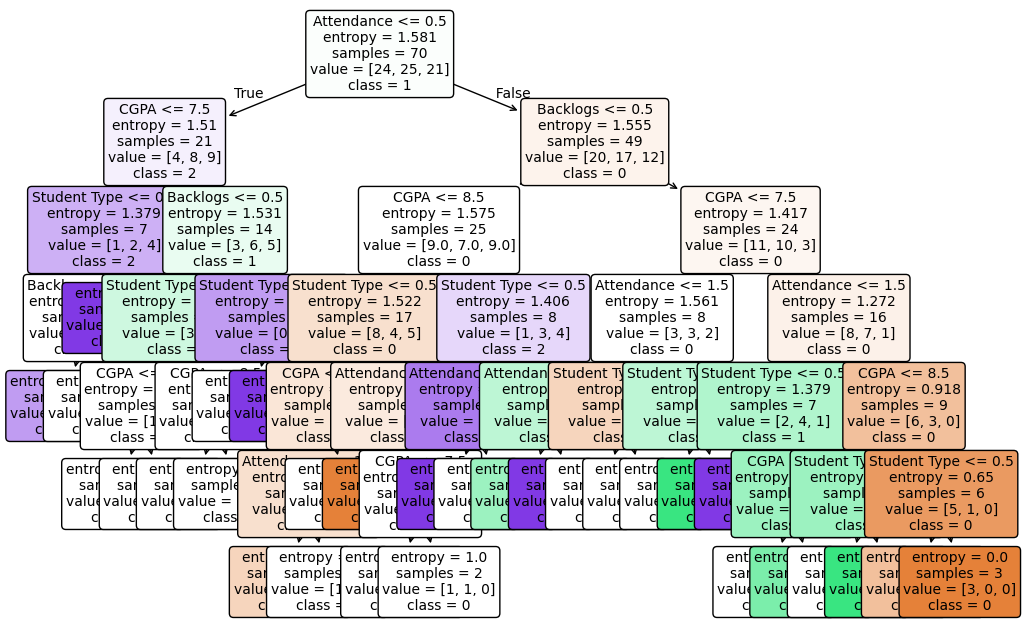

In [57]:
# Ensure class names are strings
class_names = label_encoders['Registration Slot'].classes_.astype(str)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=class_names, 
          filled=True, rounded=True, fontsize=10)

# Display the plot
plt.show()


In [59]:
from sklearn.tree import export_graphviz
import graphviz

# Ensure class names are strings
class_names = label_encoders['Registration Slot'].classes_.astype(str).tolist()

# Export the tree in DOT format
dot_data = export_graphviz(clf, out_file=None, 
                           feature_names=X.columns,  
                           class_names=class_names,  
                           filled=True, rounded=True,  
                           special_characters=True)  

# Create a Graphviz source object
graph = graphviz.Source(dot_data)

# Save and render the tree
graph.render("decision_tree")  # Saves as decision_tree.pdf or decision_tree.png
graph.view()  # To view the tree in a viewer


'decision_tree.pdf'

In [51]:
# Export the tree in text format
tree_text = export_text(clf, feature_names=list(X.columns))
print(tree_text)


|--- Attendance <= 0.50
|   |--- CGPA <= 7.50
|   |   |--- Student Type <= 0.50
|   |   |   |--- Backlogs <= 0.50
|   |   |   |   |--- class: 2
|   |   |   |--- Backlogs >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Student Type >  0.50
|   |   |   |--- class: 2
|   |--- CGPA >  7.50
|   |   |--- Backlogs <= 0.50
|   |   |   |--- Student Type <= 0.50
|   |   |   |   |--- CGPA <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CGPA >  8.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- Student Type >  0.50
|   |   |   |   |--- CGPA <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- CGPA >  8.50
|   |   |   |   |   |--- class: 0
|   |   |--- Backlogs >  0.50
|   |   |   |--- Student Type <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Student Type >  0.50
|   |   |   |   |--- class: 2
|--- Attendance >  0.50
|   |--- Backlogs <= 0.50
|   |   |--- CGPA <= 8.50
|   |   |   |--- Student Type <= 0.50
|   |   |   |   |--- CGPA <= 7.50
|   |   |   |   | 